<h1 id="tocheading">Table of Contents</h1>
<div id="toc"></div>

In [1]:
%%javascript
$.getScript('../__ipython_notebook_toc.js')

<IPython.core.display.Javascript object>

# Utility

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import metrics 
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import auc
from sklearn.metrics import f1_score
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import seaborn as sns

plt.rcParams.update({'figure.figsize':(12,7), 'figure.dpi':120})
%matplotlib inline

def overview(path):
    df = pd.read_csv(path, header=0, index_col=0);
    df.index = [x for x in range(len(df))]
    print(df.head())
    print('Class 0 : %d' % len(df['movement'] == 0))
    print('Class 1 : %d' % len(df['movement'] == 1))
    plt.plot(df.index, df.t)
    return df

def split_and_train(df, test, c, random, threshold):
    X = df.drop(['t','movement'], axis=1)
    y = df['movement']
    
    # Split the dataset into training and testing
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test, random_state=random)
    
    # Train the model
    model = LogisticRegression(C=c, solver = 'liblinear')
    model.fit(X_train, y_train)
    
    print('The learned weights are {} {}'.format(model.intercept_, model.coef_)) 

    preds = model.predict_proba(X_train) # Predict on our training set.
    print('The classification accuracy for train set: {}'.format((((preds[:,1] > threshold) == y_train).mean())))

    preds = model.predict_proba(X_test) # Predict on our test set.
    print('The classification accuracy for test set: {}'.format((((preds[:,1] > threshold) == y_test).mean())))
    
    return model, y_test.to_numpy(), preds[:,1]

def show_roc(label, prob):
    plt.plot([0, 1], [0, 1], linestyle='--', label='No Skill')
    # calculate roc curve for model
    fpr, tpr, _ = roc_curve(label, prob)
    # plot model roc curve
    plt.plot(fpr, tpr, marker='.', label='Logistic')
    # calculate roc auc
    roc_auc = roc_auc_score(label, prob)
    plt.title('ROC AUC Curve')
    plt.xlabel('True Positive Rate')
    plt.ylabel('False Positive Rate')
    plt.show()
    print('ROC AUC : %.3f' % roc_auc)


def show_pr(label, prob):
    # plot no skill precision-recall curve
    no_skill = len(label[label==1]) / len(label)
    plt.plot([0, 1], [no_skill, no_skill], linestyle='--', label='No Skill')
    # calculate precision-recall curve for model
    precision, recall, _ = precision_recall_curve(label, prob, pos_label=1)
    # plot model precision-recall curve
    plt.plot(recall, precision, marker='.', label='Logistic')
    plt.title('PR AUC Curve')
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.show()
    # calculate roc auc
    auc_score = auc(recall, precision)
    print('PR AUC : %.3f' % auc_score)
    
def show_cm(label, prob, threshold, names): # Confusion Matrix
    cnf_matrix = metrics.confusion_matrix(label, prob > threshold)
    fig, ax = plt.subplots()
    tick_marks = np.arange(len(names))
    plt.xticks(tick_marks, names)
    plt.yticks(tick_marks, names)
    # create heatmap
    sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
    ax.xaxis.set_label_position("top")
    plt.tight_layout()
    plt.title('Confusion matrix', y=1.1)
    plt.xlabel('Actual label')
    plt.ylabel('Predicted label')
    plt.show()
    
def show_f1(label, prob, threshold):
    score = f1_score(label, prob > threshold)
    print('F1 Score : %.3f' % score)
    
def build(df, test, C, random, threshold):
    model, label, prob = split_and_train(df, test, C, random, threshold)
    show_roc(label, prob)
    show_pr(label, prob)
    show_cm(label, prob, threshold, [0, 1])
    show_f1(label, prob, threshold)

# Daily lag(1) without volume

      t-1       t  movement
0  103.50  100.58         0
1  100.58  100.59         1
2  100.59  102.01         1
3  102.01  105.93         1
4  105.93  106.04         1
Class 0 : 721
Class 1 : 721


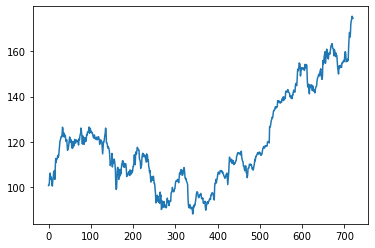

In [3]:
df = overview("../data_preprocess/df_day_1_1.csv")

The learned weights are [9.02789593e-06] [[0.00110667]]
The classification accuracy for train set: 0.5333333333333333
The classification accuracy for test set: 0.5027624309392266


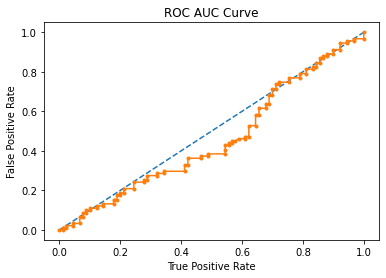

ROC AUC : 0.459


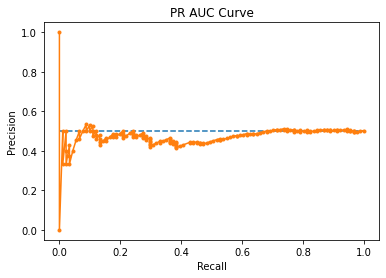

PR AUC : 0.472


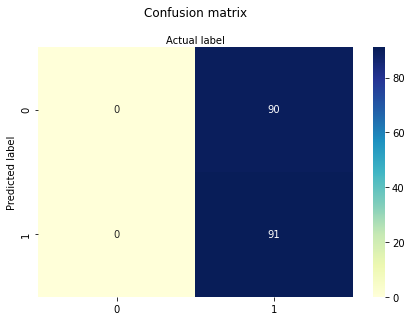

F1 Score : 0.669


In [4]:
build(df, test=0.25, C=1e5, random=0, threshold=0.52)

# Daily lag(1) with volume

            t-1       t  movement
0  5.816333e+09  100.58         0
1  6.827386e+09  100.59         1
2  6.987080e+09  102.01         1
3  4.317524e+09  105.93         1
4  6.639612e+09  106.04         1
Class 0 : 721
Class 1 : 721


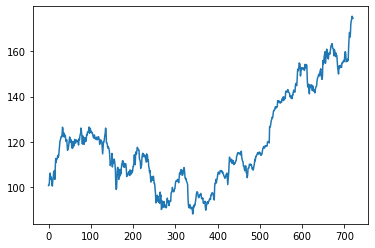

In [5]:
df = overview("../data_preprocess/df_day_1_1_v.csv")

The learned weights are [6.42039807e-21] [[1.94822359e-11]]
The classification accuracy for train set: 0.4777777777777778
The classification accuracy for test set: 0.47513812154696133


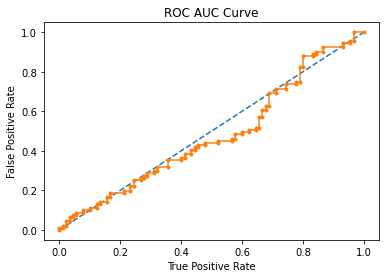

ROC AUC : 0.480


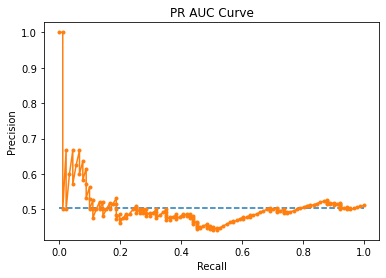

PR AUC : 0.505


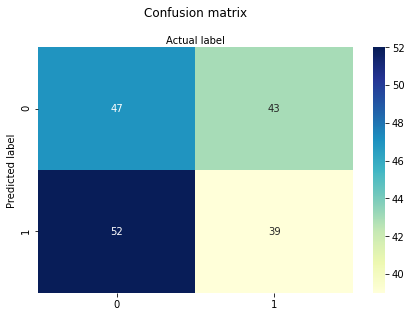

F1 Score : 0.451


In [6]:
build(df, test=0.25, C=1e5, random=0, threshold=0.52)

# Daily lag(5) without volume

      t-5     t-4     t-3     t-2     t-1       t  movement
0  103.50  100.58  100.59  102.01  105.93  106.04         1
1  100.58  100.59  102.01  105.93  106.04  103.42         0
2  100.59  102.01  105.93  106.04  103.42  104.35         1
3  102.01  105.93  106.04  103.42  104.35  103.95         0
4  105.93  106.04  103.42  104.35  103.95  101.12         0
Class 0 : 717
Class 1 : 717


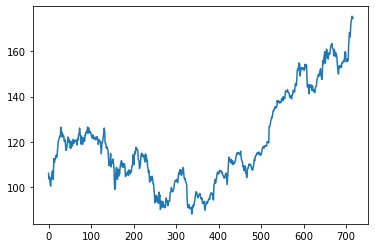

In [7]:
df = overview("../data_preprocess/df_day_5_1.csv")

The learned weights are [0.58573632] [[-0.02401162  0.01333423 -0.05889248  0.0402226   0.02523529]]
The classification accuracy for train set: 0.5363128491620112
The classification accuracy for test set: 0.43333333333333335


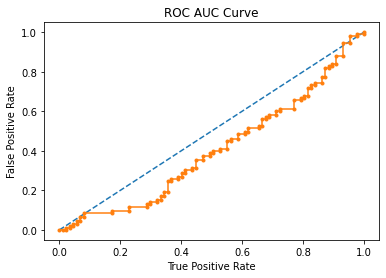

ROC AUC : 0.405


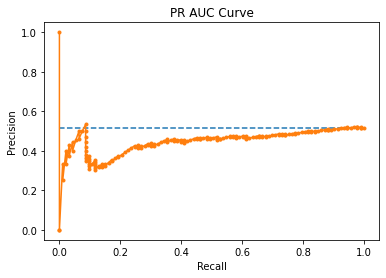

PR AUC : 0.449


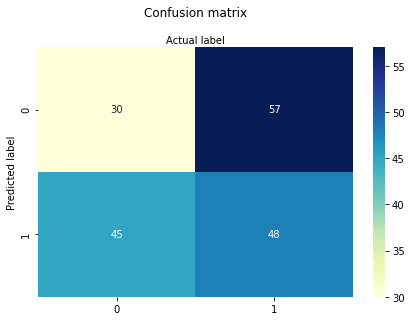

F1 Score : 0.485


In [8]:
build(df, test=0.25, C=1e5, random=0, threshold=0.52)

# Daily lag(5) with volume

      t-5           t-4           t-3           t-2           t-1       t  \
0  103.50  6.827386e+09  6.987080e+09  4.317524e+09  6.639612e+09  106.04   
1  100.58  6.987080e+09  4.317524e+09  6.639612e+09  6.013834e+09  103.42   
2  100.59  4.317524e+09  6.639612e+09  6.013834e+09  5.421407e+09  104.35   
3  102.01  6.639612e+09  6.013834e+09  5.421407e+09  7.393559e+09  103.95   
4  105.93  6.013834e+09  5.421407e+09  7.393559e+09  5.369332e+09  101.12   

   movement  
0         1  
1         0  
2         1  
3         0  
4         0  
Class 0 : 717
Class 1 : 717


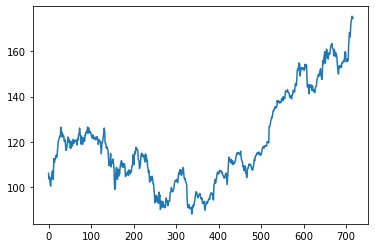

In [9]:
df = overview("../data_preprocess/df_day_5_1_v.csv")

The learned weights are [1.7081781e-20] [[-3.82103269e-18 -6.62886419e-12  9.22518997e-11 -4.92947885e-11
  -1.50685589e-11]]
The classification accuracy for train set: 0.5176908752327747
The classification accuracy for test set: 0.5222222222222223


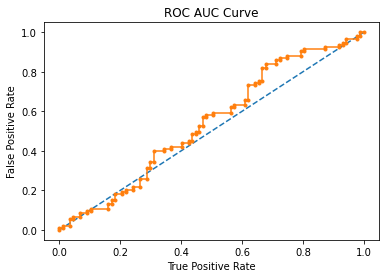

ROC AUC : 0.542


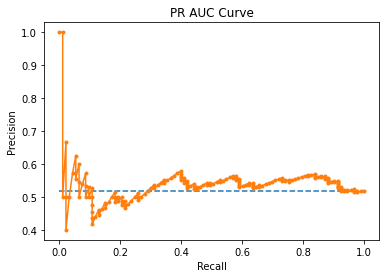

PR AUC : 0.537


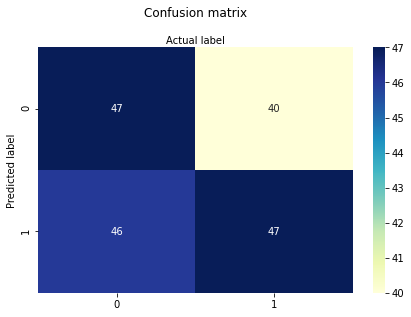

F1 Score : 0.522


In [10]:
build(df, test=0.25, C=1e5, random=0, threshold=0.52)

# Weekly lag(1) without volume

       t-1        t  movement
0  102.522  103.776         1
1  103.776  104.058         1
2  104.058  108.602         1
3  108.602  112.960         1
4  112.960  117.872         1
Class 0 : 144
Class 1 : 144


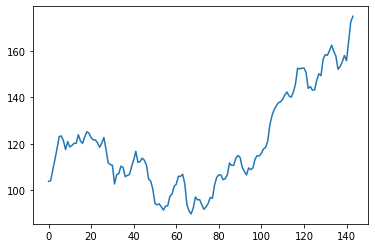

In [11]:
df = overview("../data_preprocess/df_week_1_1.csv")

The learned weights are [-0.18435454] [[0.00438577]]
The classification accuracy for train set: 0.5833333333333334
The classification accuracy for test set: 0.6111111111111112


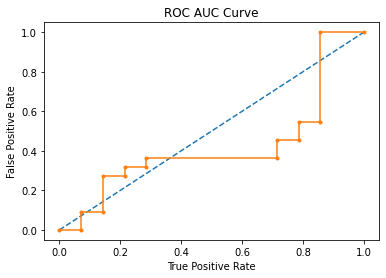

ROC AUC : 0.419


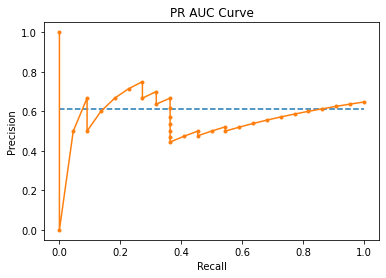

PR AUC : 0.570


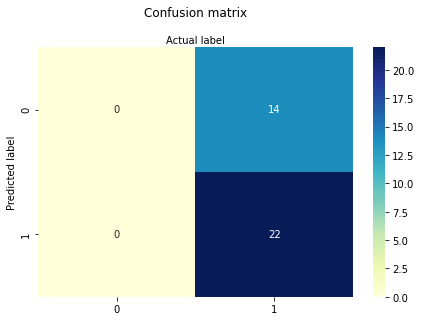

F1 Score : 0.759


In [12]:
build(df, test=0.25, C=1e5, random=0, threshold=0.52)

# Weekly lag(1) with volume

            t-1        t  movement
0  6.121411e+09  103.776         1
1  6.121212e+09  104.058         1
2  7.534797e+09  108.602         1
3  1.069853e+10  112.960         1
4  6.448667e+09  117.872         1
Class 0 : 144
Class 1 : 144


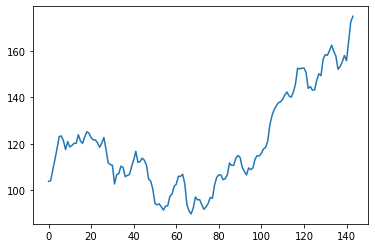

In [13]:
df = overview("../data_preprocess/df_week_1_1_v.csv")

The learned weights are [1.52276194e-20] [[6.21483381e-11]]
The classification accuracy for train set: 0.5833333333333334
The classification accuracy for test set: 0.6111111111111112


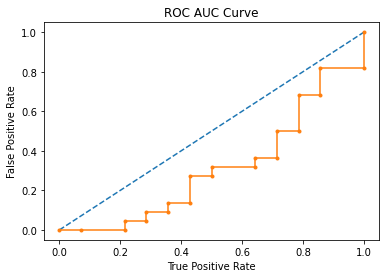

ROC AUC : 0.312


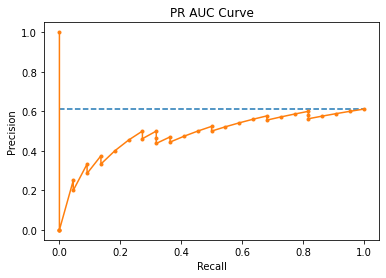

PR AUC : 0.483


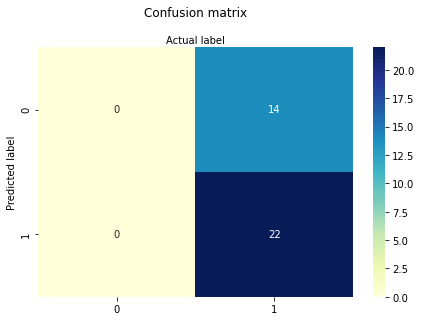

F1 Score : 0.759


In [14]:
build(df, test=0.25, C=1e5, random=0, threshold=0.52)

# Weekly lag(5) without volume

       t-5      t-4      t-3      t-2      t-1        t  movement
0  102.522  103.776  104.058  108.602  112.960  117.872         1
1  103.776  104.058  108.602  112.960  117.872  123.068         1
2  104.058  108.602  112.960  117.872  123.068  123.334         1
3  108.602  112.960  117.872  123.068  123.334  121.276         0
4  112.960  117.872  123.068  123.334  121.276  117.496         0
Class 0 : 140
Class 1 : 140


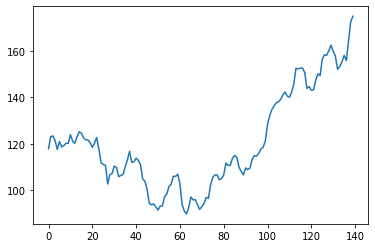

In [15]:
df = overview("../data_preprocess/df_week_5_1.csv")

The learned weights are [0.00227769] [[-0.04649915  0.06812731  0.00506047 -0.12810097  0.1029702 ]]
The classification accuracy for train set: 0.5619047619047619
The classification accuracy for test set: 0.6


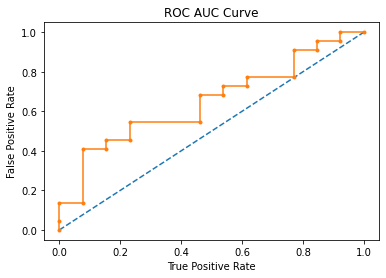

ROC AUC : 0.650


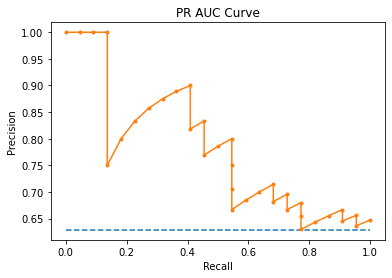

PR AUC : 0.780


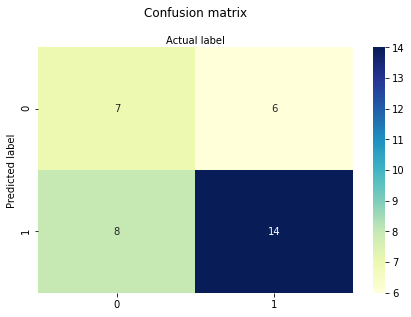

F1 Score : 0.667


In [16]:
build(df, test=0.25, C=1e5, random=0, threshold=0.52)

# Weekly lag(5) with volume

            t-5           t-4           t-3           t-2           t-1  \
0  6.121411e+09  6.121212e+09  7.534797e+09  1.069853e+10  6.448667e+09   
1  6.121212e+09  7.534797e+09  1.069853e+10  6.448667e+09  7.512006e+09   
2  7.534797e+09  1.069853e+10  6.448667e+09  7.512006e+09  6.866786e+09   
3  1.069853e+10  6.448667e+09  7.512006e+09  6.866786e+09  8.959288e+09   
4  6.448667e+09  7.512006e+09  6.866786e+09  8.959288e+09  7.334290e+09   

         t  movement  
0  117.872         1  
1  123.068         1  
2  123.334         1  
3  121.276         0  
4  117.496         0  
Class 0 : 140
Class 1 : 140


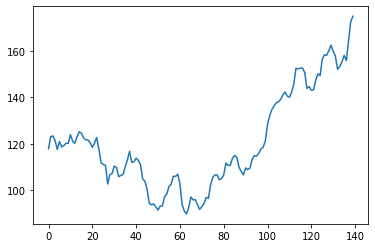

In [17]:
df = overview("../data_preprocess/df_week_5_1_v.csv")

The learned weights are [3.15822335e-19] [[-2.56156659e-10  6.58405516e-11  2.66266739e-10  1.18026523e-10
  -1.56977165e-10]]
The classification accuracy for train set: 0.5619047619047619
The classification accuracy for test set: 0.37142857142857144


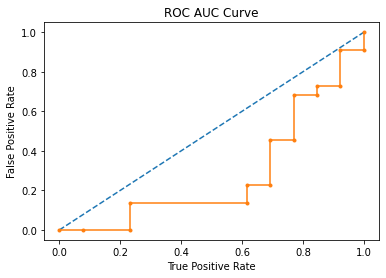

ROC AUC : 0.283


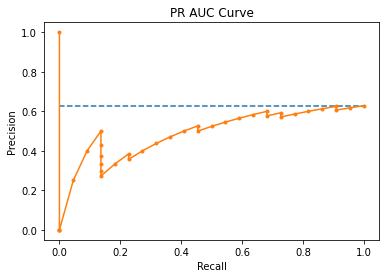

PR AUC : 0.491


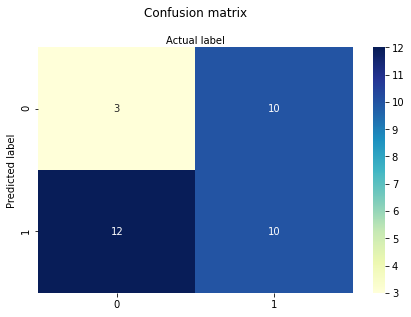

F1 Score : 0.476


In [18]:
build(df, test=0.25, C=1e5, random=0, threshold=0.52)

# Monthly lag(1) without volume

        t-1         t  movement
0  104.7395  119.3085         1
1  119.3085  119.5695         1
2  119.5695  120.8705         1
3  120.8705  122.3340         1
4  122.3340  122.6090         1
Class 0 : 36
Class 1 : 36


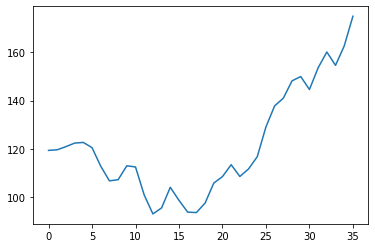

In [19]:
df = overview("../data_preprocess/df_month_1_1.csv")

The learned weights are [0.65719907] [[0.00498502]]
The classification accuracy for train set: 0.7777777777777778
The classification accuracy for test set: 0.3333333333333333


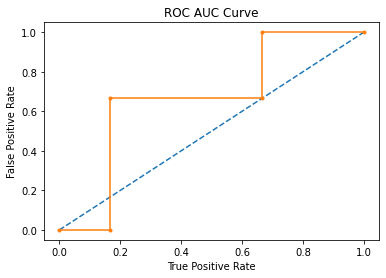

ROC AUC : 0.667


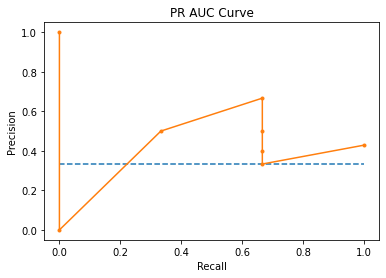

PR AUC : 0.405


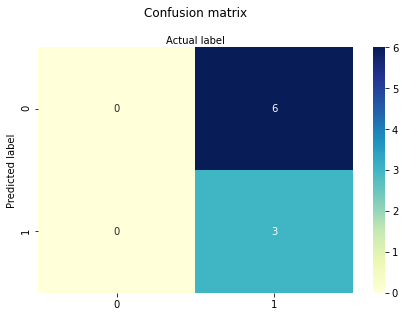

F1 Score : 0.500


In [20]:
build(df, test=0.25, C=1e5, random=0, threshold=0.52)

# Monthly lag(1) with volume

            t-1         t  movement
0  7.583508e+09  119.3085         1
1  7.434632e+09  119.5695         1
2  6.595688e+09  120.8705         1
3  5.669086e+09  122.3340         1
4  6.538647e+09  122.6090         1
Class 0 : 36
Class 1 : 36


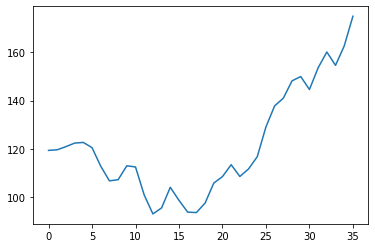

In [21]:
df = overview("../data_preprocess/df_month_1_1_v.csv")

The learned weights are [6.58365314e-20] [[2.22255375e-10]]
The classification accuracy for train set: 0.7777777777777778
The classification accuracy for test set: 0.3333333333333333


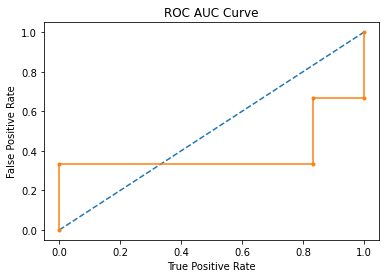

ROC AUC : 0.389


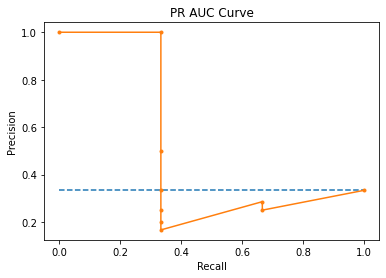

PR AUC : 0.506


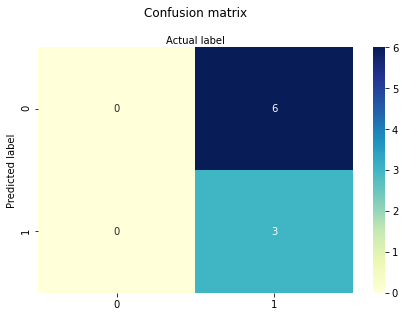

F1 Score : 0.500


In [22]:
build(df, test=0.25, C=1e5, random=0, threshold=0.52)

# Monthly lag(5) without volume

        t-5       t-4       t-3       t-2        t-1          t  movement
0  104.7395  119.3085  119.5695  120.8705  122.33400  122.60900         1
1  119.3085  119.5695  120.8705  122.3340  122.60900  120.45000         0
2  119.5695  120.8705  122.3340  122.6090  120.45000  112.75750         0
3  120.8705  122.3340  122.6090  120.4500  112.75750  106.67835         0
4  122.3340  122.6090  120.4500  112.7575  106.67835  107.14650         1
Class 0 : 32
Class 1 : 32


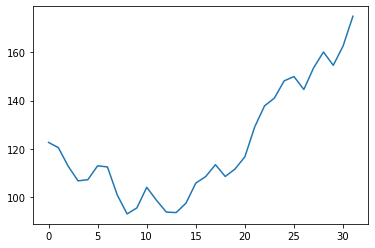

In [23]:
df = overview("../data_preprocess/df_month_5_1.csv")

The learned weights are [-2.24932528] [[-0.15948362  0.16345997  0.07869432 -0.1482067   0.08860586]]
The classification accuracy for train set: 0.6666666666666666
The classification accuracy for test set: 0.625


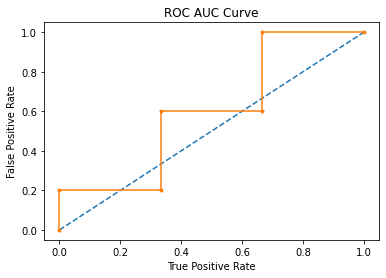

ROC AUC : 0.600


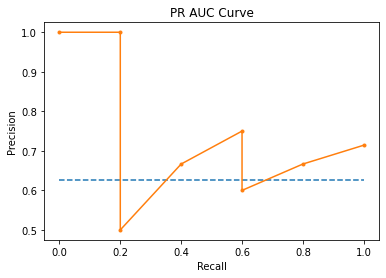

PR AUC : 0.723


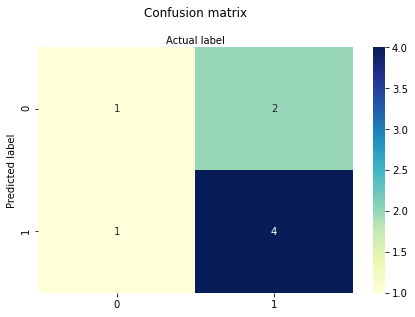

F1 Score : 0.727


In [24]:
build(df, test=0.25, C=1e5, random=0, threshold=0.52)

# Monthly lag(5) with volume

            t-5           t-4           t-3           t-2           t-1  \
0  7.583508e+09  7.434632e+09  6.595688e+09  5.669086e+09  6.538647e+09   
1  7.434632e+09  6.595688e+09  5.669086e+09  6.538647e+09  5.078305e+09   
2  6.595688e+09  5.669086e+09  6.538647e+09  5.078305e+09  6.273026e+09   
3  5.669086e+09  6.538647e+09  5.078305e+09  6.273026e+09  6.812933e+09   
4  6.538647e+09  5.078305e+09  6.273026e+09  6.812933e+09  8.105132e+09   

           t  movement  
0  122.60900         1  
1  120.45000         0  
2  112.75750         0  
3  106.67835         0  
4  107.14650         1  
Class 0 : 32
Class 1 : 32


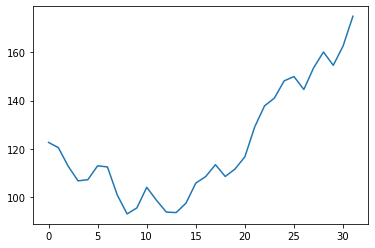

In [25]:
df = overview("../data_preprocess/df_month_5_1_v.csv")

The learned weights are [3.00890645e-18] [[-8.62531507e-10 -6.61716949e-10  1.11963164e-09 -2.23639795e-10
   8.31506447e-10]]
The classification accuracy for train set: 0.7916666666666666
The classification accuracy for test set: 0.375


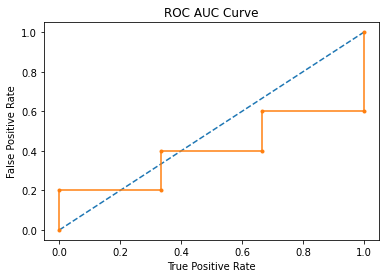

ROC AUC : 0.400


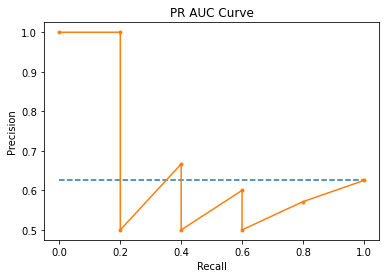

PR AUC : 0.653


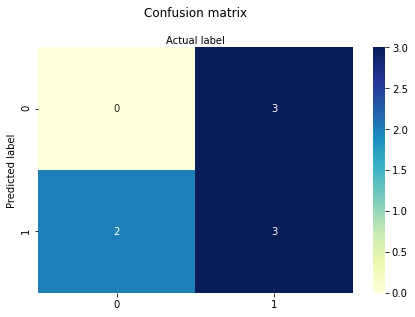

F1 Score : 0.545


In [26]:
build(df, test=0.25, C=1e5, random=0, threshold=0.52)

# Probably without data snooping?

In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import metrics 
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import auc
from sklearn.metrics import f1_score
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import seaborn as sns

plt.rcParams.update({'figure.figsize':(12,7), 'figure.dpi':120})
%matplotlib inline

def split_and_train(path_train, path_test, test, c, random, threshold):
    df_train = pd.read_csv(path_train, header=0)
    df_test = pd.read_csv(path_test, header=0);
    
    X_train = df_train.drop(['t','movement'], axis=1)
    X_test = df_test.drop(['t','movement'], axis=1)
    y_train = df_train['movement']
    y_test = df_test['movement']
    
    # Train the model
    model = LogisticRegression(C=c, solver = 'liblinear')
    model.fit(X_train, y_train)
    
    print('The learned weights are {} {}'.format(model.intercept_, model.coef_)) 

    preds = model.predict_proba(X_train) # Predict on our training set.
    print('The classification accuracy for train set: {}'.format((((preds[:,1] > threshold) == y_train).mean())))

    preds = model.predict_proba(X_test) # Predict on our test set.
    print('The classification accuracy for test set: {}'.format((((preds[:,1] > threshold) == y_test).mean())))
    
    return model, y_test.to_numpy(), preds[:,1]

def show_roc(label, prob):
    plt.plot([0, 1], [0, 1], linestyle='--', label='No Skill')
    # calculate roc curve for model
    fpr, tpr, _ = roc_curve(label, prob)
    # plot model roc curve
    plt.plot(fpr, tpr, marker='.', label='Logistic')
    # calculate roc auc
    roc_auc = roc_auc_score(label, prob)
    plt.title('ROC AUC Curve')
    plt.xlabel('True Positive Rate')
    plt.ylabel('False Positive Rate')
    plt.show()
    print('ROC AUC : %.3f' % roc_auc)


def show_pr(label, prob):
    # plot no skill precision-recall curve
    no_skill = len(label[label==1]) / len(label)
    plt.plot([0, 1], [no_skill, no_skill], linestyle='--', label='No Skill')
    # calculate precision-recall curve for model
    precision, recall, _ = precision_recall_curve(label, prob, pos_label=1)
    # plot model precision-recall curve
    plt.plot(recall, precision, marker='.', label='Logistic')
    plt.title('PR AUC Curve')
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.show()
    # calculate roc auc
    auc_score = auc(recall, precision)
    print('PR AUC : %.3f' % auc_score)
    
def show_cm(label, prob, threshold, names): # Confusion Matrix
    cnf_matrix = metrics.confusion_matrix(label, prob > threshold)
    fig, ax = plt.subplots()
    tick_marks = np.arange(len(names))
    plt.xticks(tick_marks, names)
    plt.yticks(tick_marks, names)
    # create heatmap
    sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
    ax.xaxis.set_label_position("top")
    plt.tight_layout()
    plt.title('Confusion matrix', y=1.1)
    plt.xlabel('Actual label')
    plt.ylabel('Predicted label')
    plt.show()
    
def show_f1(label, prob, threshold):
    score = f1_score(label, prob > threshold)
    print('F1 Score : %.3f' % score)
    
def build(path_train, path_test, test, C, random, threshold):
    model, label, prob = split_and_train(path_train, path_test, test, C, random, threshold)
    show_roc(label, prob)
    show_pr(label, prob)
    show_cm(label, prob, threshold, [0, 1])
    show_f1(label, prob, threshold)

# Daily lag(1) without volume

The learned weights are [2.5140343] [[-0.02295282]]
The classification accuracy for train set: 0.5465346534653466
The classification accuracy for test set: 0.4305555555555556


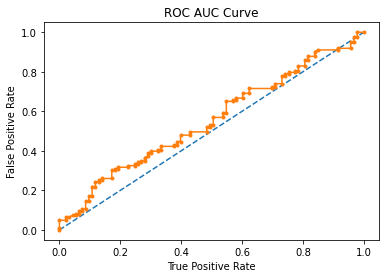

ROC AUC : 0.554


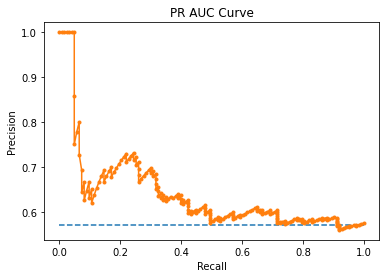

PR AUC : 0.639


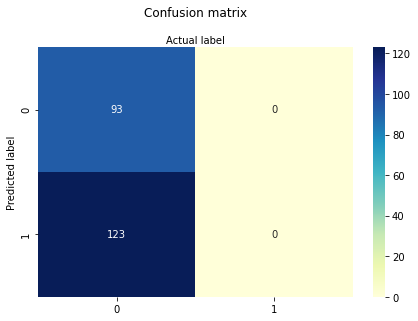

F1 Score : 0.000


In [15]:
build("../data_preprocess/train df_day_1_1.csv", "../data_preprocess/testdf_day_1_1.csv", test=0.25, C=1e5, random=0, threshold=0.52)

# Daily lag(1) with volume

The learned weights are [6.78518209e-22] [[6.9467841e-12]]
The classification accuracy for train set: 0.4910891089108911
The classification accuracy for test set: 0.42592592592592593


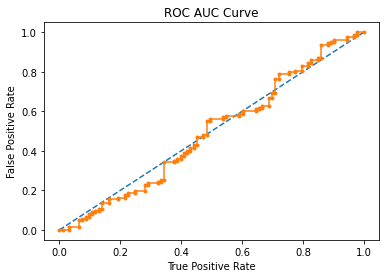

ROC AUC : 0.493


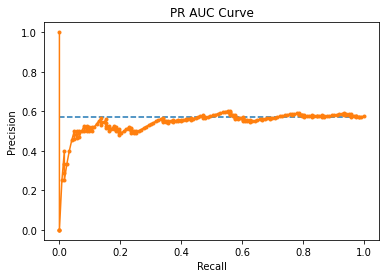

PR AUC : 0.544


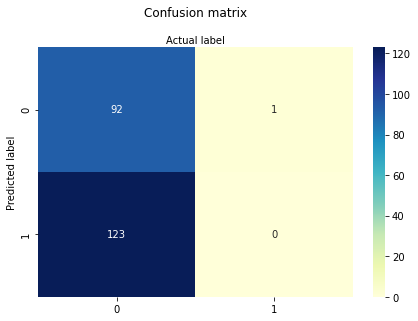

F1 Score : 0.000


In [16]:
build("../data_preprocess/train df_day_1_1_v.csv", "../data_preprocess/testdf_day_1_1_v.csv", test=0.25, C=1e5, random=0, threshold=0.52)

# Daily lag(5) without volume

The learned weights are [2.37678063] [[-0.04660958  0.01434482  0.05065581 -0.07482618  0.03473287]]
The classification accuracy for train set: 0.547808764940239
The classification accuracy for test set: 0.4325581395348837


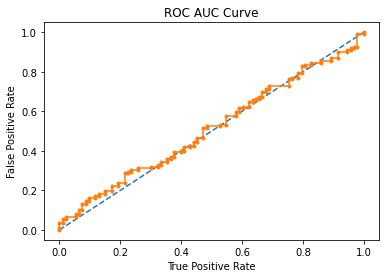

ROC AUC : 0.513


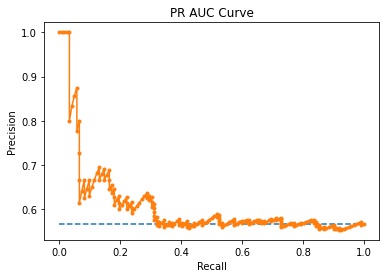

PR AUC : 0.608


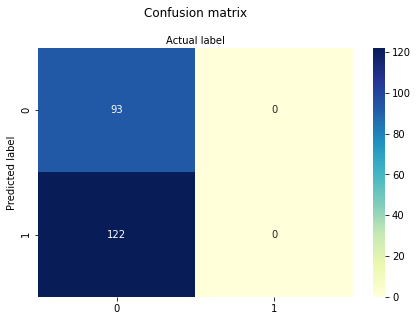

F1 Score : 0.000


In [17]:
build("../data_preprocess/train df_day_5_1.csv", "../data_preprocess/testdf_day_5_1.csv", test=0.25, C=1e5, random=0, threshold=0.52)

# Daily lag(5) with volume

The learned weights are [-7.51890744e-20] [[ 2.27542491e-12 -7.75992121e-11  6.97775988e-11  1.48130443e-11
  -1.47827315e-17]]
The classification accuracy for train set: 0.5099601593625498
The classification accuracy for test set: 0.4697674418604651


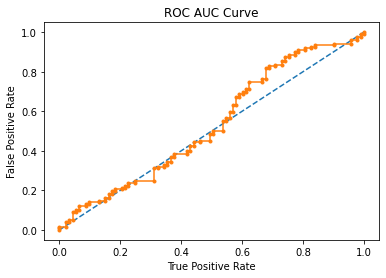

ROC AUC : 0.532


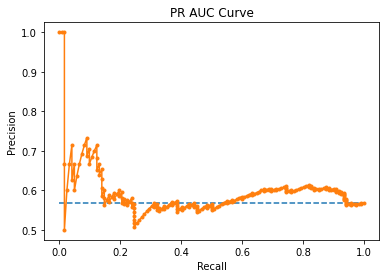

PR AUC : 0.595


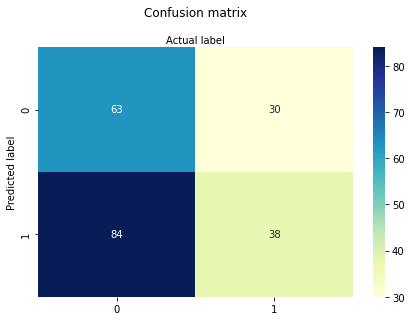

F1 Score : 0.400


In [18]:
build("../data_preprocess/train df_day_5_1_v.csv", "../data_preprocess/testdf_day_5_1_v.csv", test=0.25, C=1e5, random=0, threshold=0.52)